# Situacion Problema 
## White Wine 0     Red Wine 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [6]:
import statsmodels.api as sm

## Descripcion de datos
#### La base de datos(Wine Quality Data Set (Red & White Wine) fue recuperada de la página Kaggle la base de datos contiene información acerca variantes de vino tinto y vino blanco portugues, la base de datos contiene información acerca de 1599 vinos tintos y 4898 vinos blancos  mis variables de interés son: quality(variable categórica), alcohol(variable numérica), density(numérico)

##### 1 - type of wine      2 - fixed acidity
##### 3 - volatile acidity   4 - citric acid:
##### 5 - residual sugar   6 - chlorides:
##### 7 - free sulfur dioxide:  8 - total sulfur dioxide: 
##### 9 - density  10 - pH:
##### 11 - sulphates  12 - alcohol:
##### Output variable:
##### 13 - quality: score between 0 (very bad) and 10 (very excellent) by wine experts


## Hallazgos interesantes 

##### 1. En promedio de 6,497 vinos(rojos y blancos) el vino blanco en promedio mostro ser de mejor calidad 
##### 2. La correlación más fuerte con la variable de interés quality es alcohol
##### 3. Pudimos observar que entre más alcohol tiene un vino por lo general muestra ser de mejor calidad.
##### 4. Entre la densidad del vino sea menor, mayor la calidad del vino
##### 5. Se encontró vinos con valores atípicos con grandes cantidades de alcohol que sus contrapartes 
##### 6. Se realizo un analsis de regresion con las variables quality y alcohol


In [7]:
%ls

 00_00_binder.ipynb                    'CODE SP.csv'
 00_00_primer_pasos.ipynb               covid19Vaccination.xlsx
 01_01_data_types.ipynb                 datasets/
 01_02_read_iloc_unique_groupby.ipynb  'Primera Clase.ipynb'
 02_00_data_wrangling.ipynb             README.md
 02_01_null_display.ipynb               requirements.txt
 02_02_basic_math.ipynb                'Situacion Problema CODE (3) (1).ipynb'
 A01720591_pres_final                  'Situacion Problema CODE (3).ipynb'
 A3                                    'Situacion Problema CODIGO1.ipynb'
 A3_A00826880.ipynb                    'Situacion Problema CODIGO2.ipynb'
 A3_A01720591.ipynb                    'Situacion Problema CODIGO3.ipynb'
'A5 (1).ipynb'                          wine-quality-white-and-red.csv
 A7.ipynb


In [8]:
df = pd.read_csv('CODE SP.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# Pregunta 1 
## En nuestra base de datos de 6,497 vinos blancos y tintos en promedio cuál fue el de mayor calidad según los calificadores?



In [10]:
tabla = pd.pivot_table(df,
                       columns = [ 'type'],
                       values = [ 'quality'],
                       aggfunc = {'quality':['mean']}
                      )
tabla 

,type,0,1
quality,mean,5.877909,5.636023


## Conclusion
#### En promedio en nuestra base de datos el vino blanco muestra ser el vino con mayor calidad segun los calificadores a partir de nuestra base de datos de 6497 vinos 

In [11]:
tabla.columns

Int64Index([0, 1], dtype='int64', name='type')

In [12]:
df.columns 

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [13]:
ndf = df[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]
ndf

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
df = ndf
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Pregunta 2 
### Cual es la relacion entre densidad('density') y calidad del vino('quality') ?

Text(0.5, 1.0, ' Calidad del vino vs densidad del vino')

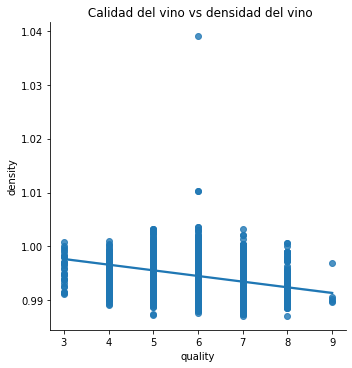

In [15]:
sns.lmplot(x = 'quality',
           y = 'density',
           data= df,
           fit_reg = True,
          )
plt.title(' Calidad del vino vs densidad del vino')


## Conclusion
#### Podemos observar que entre mas baja la densidad del vino de igual manera sube la calidad del vino 

In [16]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Pregunta 3
## Cual es la relacion mas grande de las variables con nuestra variable de interes 'quality'

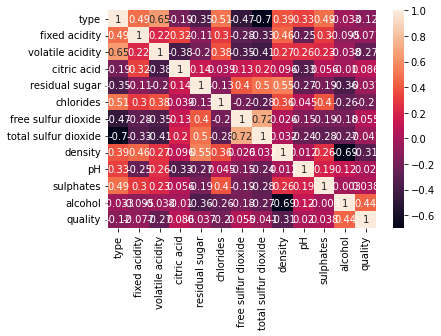

In [17]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

### Conclusion 
#### Podemos observar que la relacion mas grande con la variable quality es la varibale alcohol

# Pregunta 4 
## Hay datos atipicos en las variables de interes ?

Text(0.5, 1.0, 'Valores atipicos de alcohol')

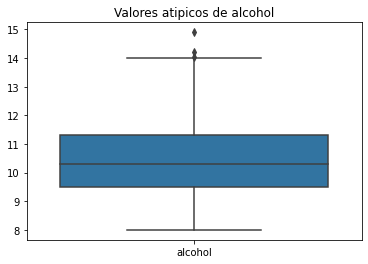

In [18]:
sns.boxplot(data=df.loc[:,['alcohol']])
plt.title('Valores atipicos de alcohol')

Text(0.5, 1.0, 'Valores atipicos en quality')

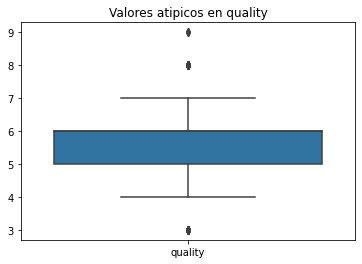

In [19]:
sns.boxplot(data=df.loc[:,['quality']])
plt.title('Valores atipicos en quality')

## Conclusion
### Podemos observar que en las 2 variables de interes podemos observar datos atipicos 

## Pregunta 5 
#### En nuestra base de datos de 6,497 vinos blancos y tintos en promedio cuál fue el de mayor calidad según los calificadores?


In [20]:
tabla = pd.pivot_table(df,
                       columns = [ 'type'],
                       values = [ 'quality'],
                       aggfunc = {'quality':['mean']}
                      )
tabla          

,type,0,1
quality,mean,5.877909,5.636023


### Conclusion
#### Podemos observar que en promedio nuestro vino blanco en nuestra base de datos recibió una calificación más alta de calidad que su contraparte el vino tinto 


In [21]:
import pandas as pd 
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
%ls

 00_00_binder.ipynb                    'CODE SP.csv'
 00_00_primer_pasos.ipynb               covid19Vaccination.xlsx
 01_01_data_types.ipynb                 datasets/
 01_02_read_iloc_unique_groupby.ipynb  'Primera Clase.ipynb'
 02_00_data_wrangling.ipynb             README.md
 02_01_null_display.ipynb               requirements.txt
 02_02_basic_math.ipynb                'Situacion Problema CODE (3) (1).ipynb'
 A01720591_pres_final                  'Situacion Problema CODE (3).ipynb'
 A3                                    'Situacion Problema CODIGO1.ipynb'
 A3_A00826880.ipynb                    'Situacion Problema CODIGO2.ipynb'
 A3_A01720591.ipynb                    'Situacion Problema CODIGO3.ipynb'
'A5 (1).ipynb'                          wine-quality-white-and-red.csv
 A7.ipynb


In [23]:
df = pd.read_csv('wine-quality-white-and-red.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Pregunta 6
#### ¿Cual es la correlación existente entre la variable 'alcohol' y la variable 'quality'

Text(0.5, 1.0, 'Scatterplot de calidad de alcohol vs calidad de vino')

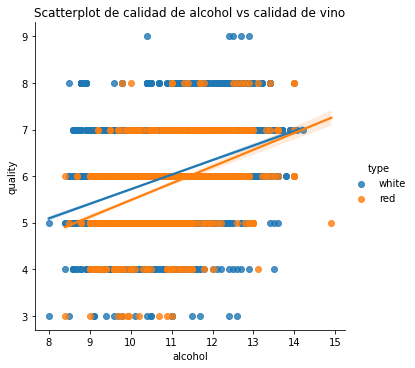

In [24]:
sns.lmplot(x='alcohol',
           y= 'quality',
           data=df,
           fit_reg= True,
           hue= 'type'
          )
plt.title('Scatterplot de calidad de alcohol vs calidad de vino')

### Conclusion
#### Podemos observar que con la linea de regresion que en general a medida que incrementa el alcohol en el vino de igual manera su calidad 

# Pregunta 7
### ¿Qué tan bueno es el análisis de regresión para 'quality en función de alcohol, ¿Qué indica la R-cuadrada?

In [25]:
df.columns 

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [26]:
model = sm.OLS.from_formula('quality~alcohol',
                            data=df)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.50e-312
Time:                        03:25:03   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

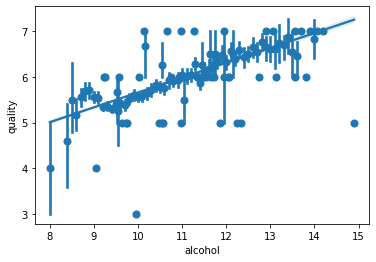

In [27]:
ax =sns.regplot(x='alcohol',
                y='quality',
                data=df,
                x_estimator = np.mean,
               )

## Conclusion 
### Como podemos observar nuestra R-squared es muy pequeña, solo del 0.197 lo cual representa que este modelo solo representa el 19.7% lo cual no es muy eficiente, nuestros valores intercept son menores que alfa( 0.05 ) por lo cual podemos conlcuir que se esta manejando con un buen modelo.

`Quality = 2.4053 + 0.3253*Alcohol`